# Tehtävä 2

>
># Tehtävä 2: Datan visualisointi (max. 5 p)
>
>_CRISP-DM: "Data Understanding"_
>
>- On tärkeää pyrkiä hahmottamaan keskeisiä asioita datasta
>- Valitse huolellisesti käyttävät kuviotyypit
>- Ryhmittelyä kannattaa käyttää apuna visualisoinnissa
>
>Datan visualisointi on tavallaan ohjaamatonta oppimista
>
>- Yhtenä tavoitteena on löytää uusia puolia datasta
>- Voidaan löytää erilaista informaatiota kuin raakadatasta
>
>Visualisoi myös käyttäen
>
>- tilastollisia operaatioita
>- datan ryhmittelyä
>- ~~data skaalattuna (esim. normaalijakaumaan)~~
>
>
>**Vaihe palautettava viimeistään 25.09.2022**
>

# Hahmotetaan keskeisiä asioita datasta

Dataan on tilastoitu tietoja miljoonasta aurinkopaneeliasennuksesta tai aurinkovoimalasta. Kunkin asennuksen tiedot on jaettu enimmillään 78 sarakkeeseen.

Heti aluksi tarkastellaan mitä tietoja sarakkeisiin on tallennettu ja pyritään tekemään niistä pieni yhteenveto. Alla olevassa taulukossa on listattu osa datan sarakkeista, joiden on arvioitu olevan kiinnostavimmat tiedot datasta. Lyhyen esiselvityksen tuloksena sarakkeista on selvitetty minkälaisessa muodossa data on.

Taulukossa on:

- **Kuvaus**, mitä sarake tarkoittaa.
- **Yksikkö** on ilmoitettu niille sarakkeille, jotka sisältävät arvon jollekin suureelle tai jonkin komponentin kappalemäärän.
- **Tyyppi** kuvastaa sarakkeen sisältämän tiedon tietotyyppiä, mutta ei suoraan tarkoita sitä tietotyyppiä, jonka sarake saa tiedon latauksen yhteydessä.
  - **date** on muutettavissa päivämäärän sisältäväksi tietotyypiksi
  - **bool** on tietotyypiltään kokonaisluku, jolla on käytännössä arvo `'1 == TRUE'`, `'0 == FALSE'` tai `'-9999 == NULL'`.
- **Kategoria** on alustava arvio siitä, miten sarakkeet voitaisiin ryhmitellä tai kategorisoida.
- **Sarakkeiden nimet** ilmaisee millä nimellä ne ovat datassa.

| Kuvaus                                             | Yksikkö       | Tyyppi       | Kategoria     | Sarakkeiden nimet               |                                 |                                 | 
|----------------------------------------------------|---------------|--------------|---------------|---------------------------------|---------------------------------|---------------------------------| 
| Asennuspäivämäärä                                  |               | date         | päivämäärä    | installation_date               |                                 |                                 | 
| Paneelijärjestelmän teho                           | kW            | float        | teho          | system_size_DC                  |                                 |                                 | 
| Kokonaishinta                                      | USD (dollari) | float        | hinta         | total_installed_price           |                                 |                                 | 
| Asiakasryhmä                                       |               | object       | asiakasryhmä  | customer_segment                |                                 |                                 | 
| Postikoodi                                         |               | object       | paikka        | zip_code                        |                                 |                                 | 
| Kaupunki                                           |               | object       | paikka        | city                            |                                 |                                 | 
| Osavaltio (lyhenne)                                |               | object       | paikka        | state                           |                                 |                                 | 
| Kolmannen osapuolen omistama                       |               | bool         | meta          | third_party_owned               |                                 |                                 | 
| Paneelin malli                                     |               | object       | komponentti   | module_model_1                  | module_model_2                  | module_model_3                  | 
| Paneelien määrä                                    | kpl           | int          | teho          | module_quantity_1               | module_quantity_2               | module_quantity_3               | 
| Paneeliteknologia                                  |               | object       | paneelityyppi | technology_module_1             | technology_module_2             | technology_module_3             | 
| Paneelin nimellisteho                              | W_p vai kW_p? | int OR float | teho          | nameplate_capacity_module_1     | nameplate_capacity_module_2     | nameplate_capacity_module_3     | 
| Paneelin hyötysuhde                                | -             | float        | teho          | efficiency_module_1             | efficiency_module_2             | efficiency_module_3             | 

Datassa on paljon sarakkeita, joista on asennuskohtaisesti yhdestä kolmeen (1-3) mahdollisesti eri arvoa asioille, jotka kuvaavat samaa asiaa. Toisin sanoen yhdessä asennuksessa on oletettavasti voitu käyttää esimerkiksi enimmillään kolmea eri paneeliteknologiaa. Loogista voisi myös olla, että teknologiaa `technology_module_2` käyttäviä paneeleita olisi asennettu määrä, joka on ilmoitettu sarakkeessa `module_quantity_2`. Tälle olisi hyvä saada datasta varmistus.

# Dataa hahmottavia visualisointeja

Seuraavaksi esitetään muutamia visualisointeja, joiden tavoitteena on lisätä ymmärrystä datasta. Kuvaajista pyritään tekemään havaintoja, jotta jatkossa datasta voidaan tehdä tarkempia kuvaajia. Havaintoja voidaan ehkä käyttää myös edellä olevassa taulukossa määritettyjen ryhmittelyjen tarkentamiseen.

## Asennusten teho- ja hintakehitys

Ensimmäiset kuvaajat keskittyvät visualisoimaan asennusten hintojen ja sähkötehon kehitystä koko datan kattavalta ajalta.

Ennen kuvaajia nähdään niiden piirtoon tarvittavat koodirivit. Kuvaajien tulkintaa on avattu niiden jälkeen.

### Asennusten vuosittainen hintojen keskiarvo asiakasryhmittäin

#### Ladataan kirjastot

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Tutkittava data ladataan ja esikäsitellään hiukan

In [2]:
url_src = "../data/LBNL_file.csv"

# otetaan muutamia sarakkeita käsiteltäväksi
cols = ['installation_date', 'system_size_DC', 'total_installed_price', 'customer_segment']
df = pd.read_csv(url_src, low_memory=False, usecols=cols, na_values = '-9999')

# muutetaan asennuspäivämäärä sarake datetime-objektiksi, jotta lajittelu onnistuu
df['installation_date'] = pd.to_datetime(df['installation_date'], format='%d-%b-%Y %H:%M:%S') 

# lajitellaan päivämäärän mukaan
df = df.sort_values('installation_date')

# tarvitaan vuotta ryhmittelyyn ja se saadaan datetimesta() dt.year
df['year'] = df['installation_date'].dt.year

#### Piirretään kuvaajat

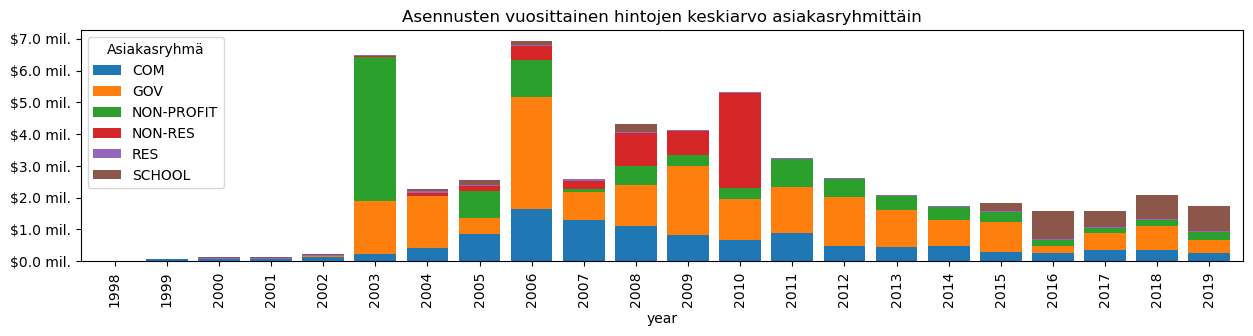

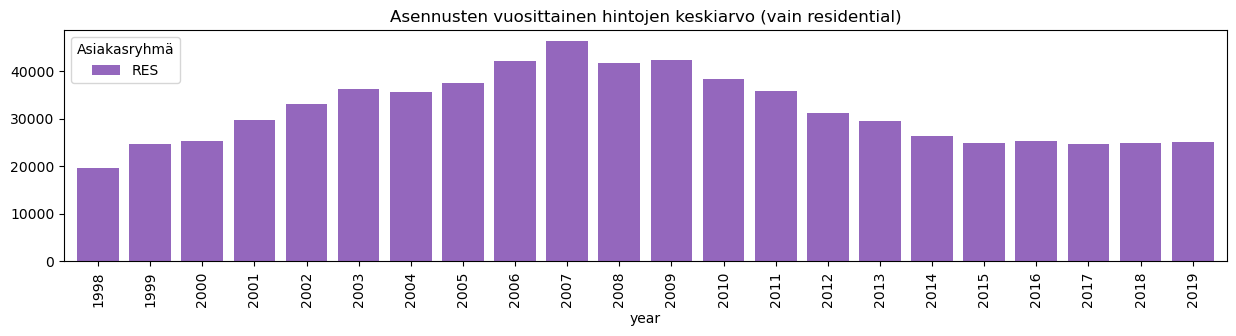

In [3]:
# kuvioiden oletuskoko
def_figsize = [15,3]

# Asteikkojen muunnos | Source: https://matplotlib.org/stable/gallery/ticks/custom_ticker1.html
def millions(x, pos):
    """The two arguments are the value and tick position."""
    return '${:1.1f} mil.'.format(x*1e-6)

def billions(x, pos):
    """The two arguments are the value and tick position."""
    return '${:1.1f} mrd.'.format(x*1e-9)

# asennusten vuosittainen hintojen keskiarvo asiakasryhmittäin
df_price_mean = df.pivot_table(index='year', columns='customer_segment', values='total_installed_price', aggfunc='mean')
ax = df_price_mean.plot(kind='bar', stacked=True, title='Asennusten vuosittainen hintojen keskiarvo asiakasryhmittäin', figsize=def_figsize, width=0.8)
ax.yaxis.set_major_formatter(millions)
plt.legend(title = 'Asiakasryhmä', loc='upper left')
plt.show()

# pelkkä residential
df_res_only = df.loc[df['customer_segment'].isin(['RES'])]

df_price_mean = df_res_only.pivot_table(index='year', columns='customer_segment', values='total_installed_price', aggfunc='mean')
df_price_mean.plot(kind='bar', stacked=True, title='Asennusten vuosittainen hintojen keskiarvo (vain residential)', figsize=def_figsize, width=0.8, color='tab:purple')
plt.legend(title = 'Asiakasryhmä', loc='upper left')
plt.show()

#### Tulkitaan kuvaajia

Kuvaajista nähdään, että asuinrakennusten (residential, RES) aurinkovoimaloiden keskihinta on pysynyt tasaisimpana koko datassa. Tämä voi johtua muun muassa siitä, että kyseisen asiakasryhmän tilaamat asennukset eivät ehkä normaalisti ole kovin suuria, jolloin niiden hintakin jää suurempiin voimaloihin nähden vaatimattomaksi. Tämän takia kyseisen asiakasryhmän keskihinta on otettu omaan kuvaajaan. Asiakasryhmä todennäköisesti myös koostuu suurelta osin yksityisistä henkilöistä, mikä vaikuttaa tilausten kokoon.

Kaikki asiakasryhmät sisältävässä kuvaajassa huomataan suurempaa vaihtelua. Yksi selittävä tekijä saattaa olla datan kattavuus. Ehkä datan kerääjä ei ole jostain syystä tilastoinut suurten tilausten hintoja. Toisaalta suurempien aurinkovoimaloiden yleistyminen on saattanut alkaa vasta vuonna 2003 alueella, josta data on kerätty. Suuri muutos voi johtua myös politiikan muutoksesta, sillä vuonna 2003 keskihintojen kasvu on tapahtunut lähinnä säätiöiden (NON-PROFIT) ja julkisen hallinnon (GOV) kohdalla. Kaupalliset toimijat (COM) seurasivat perässä pienellä viivellä. Osavaltiokohtainen politiikka saattaa näkyä siksikin, että 99.8971% datasta on Kaliforniasta, kuten taustaselvityksessä selvisi.

Hintojen keskiarvon vaihtelu on suurinta vuosina 2003-2011. Tämän jälkeen keskiarvo tasaantuu kaikissa ryhmissä. Tämä voisi viitata teknologian vakiintumiseen ja yleistymiseen, mikä on huomattavissa seuraavastakin kuvaajasta.

**Asiakassegmenteistä**

Asiakasryhmissä on huomattavissa myös hieman päällekkäisyyksiä. Tässä vaiheessa data-analyysiä on vielä epäselvää*, miksi asiakasryhmä ei-asuinkohteet (NON-RES) käytännössä häviää vuoden 2010 jälkeen. Onko luokittelu jätetty pois turhana? Toisena päällekkäisyytenä voisi pitää erityisesti viimeisten viiden vuoden ajalta kouluja (SCHOOL) ja julkista hallintoa. Vuonna 2016 ryhmien keskihinnat näyttäisivät lähes vaihtuvan keskenään ilman, että keskihinnoissa yleisellä tasolla olisi tapahtunut huomattavaa muutosta.

**HUOM.** Tässäkin mukana olevissa hintatiedoissa huomattiin epärealistisia arvoja, joita ei vielä suodatettu pois. Käytännössä huomattiin, että vuosina 2015-2019 asennusten pienin hinta oli 0,01 dollaria.

\* Myöhemmin selvisi, että NON-RES-ryhmä on ollut käytössä vain Arizonan osavaltiossa, mikä voi olla syy poikkeavalle luokittelulle. Arizonasta on myös huomattavan vähän dataa mukana.

### Asennusten yhteenlasketut kokonaishinnat asiakasegmenteittäin

Käytetään edellisessä kohdassa ladattua dataa.

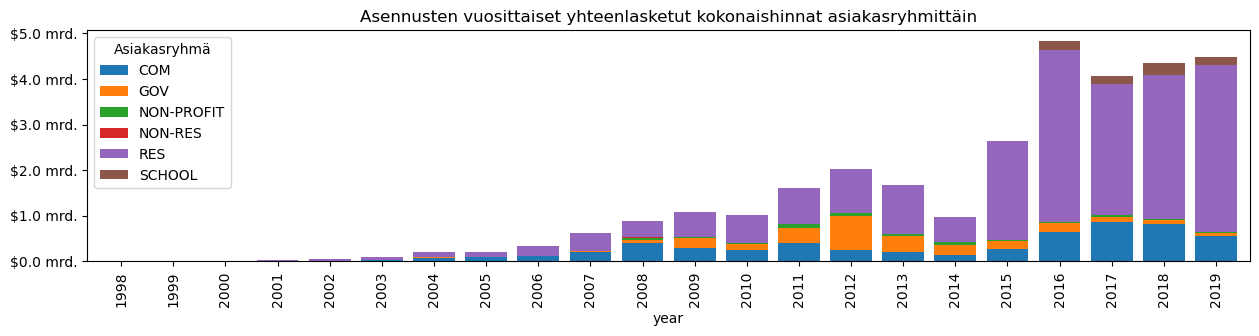

In [4]:
# asennusten yhteenlasketut kokonaishinnat asiakasegmenteittäin
df_price_sum = df.pivot_table(index='year', columns='customer_segment', values='total_installed_price', aggfunc='sum')
ax = df_price_sum.plot(kind='bar', stacked=True, title='Asennusten vuosittaiset yhteenlasketut kokonaishinnat asiakasryhmittäin', figsize=def_figsize, width=0.8)
ax.yaxis.set_major_formatter(billions)
plt.legend(title = 'Asiakasryhmä', loc='upper left')
plt.show()

Tässä kuvassa näkyy parhaiten asennuksiin käytetyn rahamäärän muutokset, paitsi ensimmäisten vuosien osalta niiden ollessa kuvaajan asteikolle sopimattomia. Merkittävin huomio lienee asuinkohteiden pienehköjen asennusten nousu rahassa mitattuna selvästi suurimmaksi alkaen vuodesta 2015.

Taustaselvityksessä huomattiin myös, että 97% asennuksista on tehty `residential` asiakassegmentissä.

### Asennusten määrä ja hintatehosuhteen keskiarvo

Lasketaan uuteen sarakkeeseen voimalan hinta asennettua kilowattia kohden.

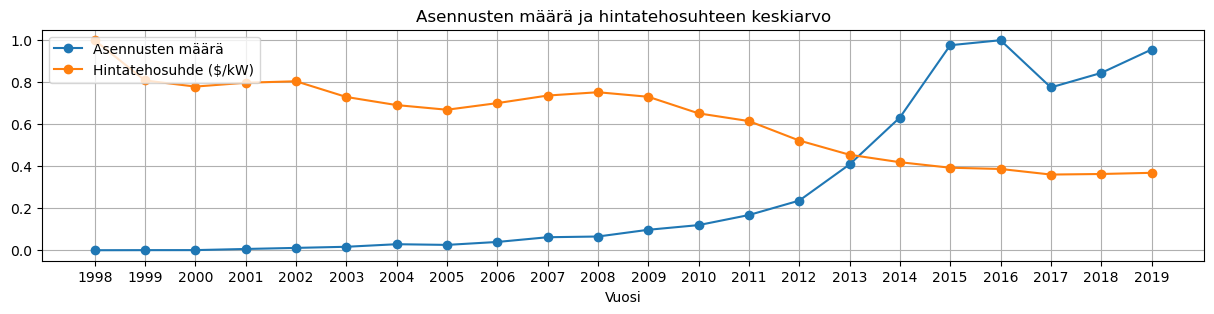

In [5]:
# lasketaan hintatehosuhde sarakkeeksi
df['price_per_kw'] = df['total_installed_price'] / df['system_size_DC']

# kootaan pivot-tauluun vuosittaiset asennusten määrät sekä hintatehosuhteen keskiarvo sekä normalisoidaan arvot
df_price_per_kw = df.pivot_table(index='year', values=['installation_date', 'price_per_kw'], aggfunc={'installation_date':'count', 'price_per_kw':'mean'}).apply(lambda x: x/x.max())

# viivakuvaaja asennusten määrä ja hintatehosuhde
df_price_per_kw.plot(kind='line', figsize=def_figsize, grid=True, linestyle='solid', marker = 'o', title='Asennusten määrä ja hintatehosuhteen keskiarvo', xlabel='Vuosi')
plt.legend(labels =['Asennusten määrä', 'Hintatehosuhde ($/kW)'], loc='upper left')
plt.xticks(df['year'].unique()) #asetetaan x-akselille jokainen vuosi näkyviin
plt.show()

Tässä kuvaajassa nähdään hintatehosuhteen kehitys asennusten määrän rinnalla. Nopea johtopäätös sanoo, että hintatehosuhteen lasku on tehnyt aurinkopaneelien hankinnasta taloudellisesti kannattavaa yhä useammissa tilanteissa, mikä on johtanut asennusten määrän suureen nousuun. Nousu on kuitenkin taittunut vuoden 2015 jälkeen.

Hintakehitys on ollut vuoden 2008 jälkeen lähes täysin vain laskeva. Hinnan puolittumista noin yhdeksän vuoden aikana alkaen vuodesta 2008 voidaan pitää merkittävänä muutoksena.

## Asennusten hinnan keskiarvo asiakasryhmittäin

Käytetään jälleen aluksi ladattua dataa.

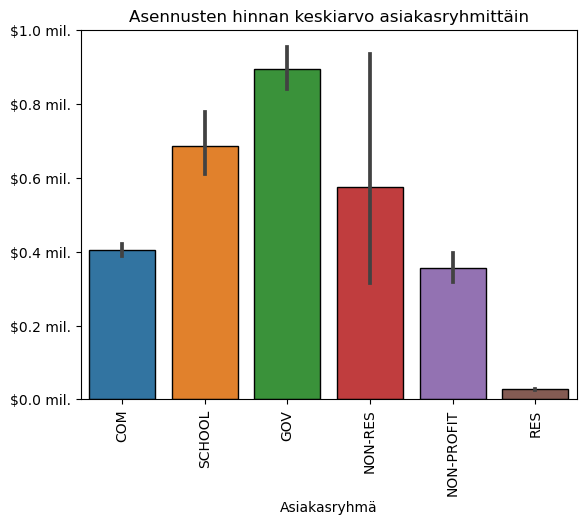

In [6]:
df = df.sort_values(['total_installed_price'], ascending=False)
res = df[['customer_segment','total_installed_price']]

#  Piirron toteuttaminen
ax = sns.barplot(y='total_installed_price', x='customer_segment', data=res, errorbar=('ci', 95), edgecolor='k', linewidth=1)
ax.set_title("Asennusten hinnan keskiarvo asiakasryhmittäin")
ax.set_xlabel('Asiakasryhmä')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(millions)
plt.xticks(rotation=90)

plt.show()

Jatketaan asiakasryhmien tarkastelua. Kuvan pylväät edustavat asennuksen hinnan keskiarvoa koko datassa asiakasryhmittäin. Pylvään päällä oleva viiva kertoo tilastollisesti lasketun luottamusvälin luottamustasolla 95%. Viiva siis ilmaisee, mille välille vastaavalla tavalla jakautuneen datan keskiarvo asettuu 95%:n varmuudella. Otosjoukon koko vaikuttaa ainakin tässä tapauksessa eniten välin pituuteen.

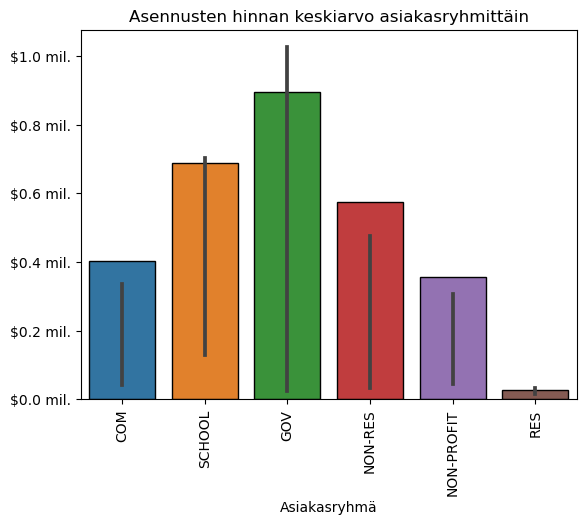

In [7]:
#  Piirron toteuttaminen
ax = sns.barplot(y='total_installed_price', x='customer_segment', data=res, errorbar=('pi', 50), edgecolor='k', linewidth=1)
ax.set_title("Asennusten hinnan keskiarvo asiakasryhmittäin")
ax.set_xlabel('Asiakasryhmä')
ax.set_ylabel('')
ax.yaxis.set_major_formatter(millions)
plt.xticks(rotation=90)

plt.show()

Viivaa voidaan käyttää myös kuvaamaan datapisteiden jakautumista. Yllä olevassa kuvassa viiva näyttää välin, jolle keskimmäiset 50% datapisteistä asettuu. Toisin sanoen viivan alle jää 25% datapisteistä ja ylle toiset 25%.

Kuvasta voidaan päätellä, että kalleimmat voimalat ovat huomattavasti kalliimpia kuin suurin osa asennuksista, sillä osassa ryhmistä (COM, NON-RES, NON-PROFIT) asennuksen hinnan keskiarvo on suurempi kuin 75% ryhmän asennusten hinnoista. Vertailun vuoksi todettakoon, että normaalijakautuneessa datassa keskiarvo asettuisi viivan puoliväliin.

## Hyötysuhde

Ladataan data uudelleen lähdedatasta ja tehdään lyhyt esikäsittely ja suodatus ennen piirtoa.

     efficiency_module_1                              
                   count      mean       min       max
year                                                  
2002                  64  0.116051  0.054687  0.129970
2003                 187  0.126829  0.054687  0.172818
2004                 848  0.128919  0.054687  0.161017
2005                1353  0.132244  0.054687  0.200526
2006                3056  0.136344  0.055357  0.179469
2007                5678  0.140375  0.059649  0.187035
2008                8325  0.146748  0.054687  0.187035
2009               13262  0.149542  0.059649  0.211564
2010               16515  0.147333  0.051276  0.195007
2011               23760  0.150753  0.051276  0.205431
2012               33680  0.158251  0.054687  0.210337
2013               57955  0.161101  0.058182  0.211564
2014               75003  0.164315  0.054687  0.211564
2015              127786  0.168167  0.054687  0.211564
2016              152278  0.173113  0.084000  0.221123
2017      

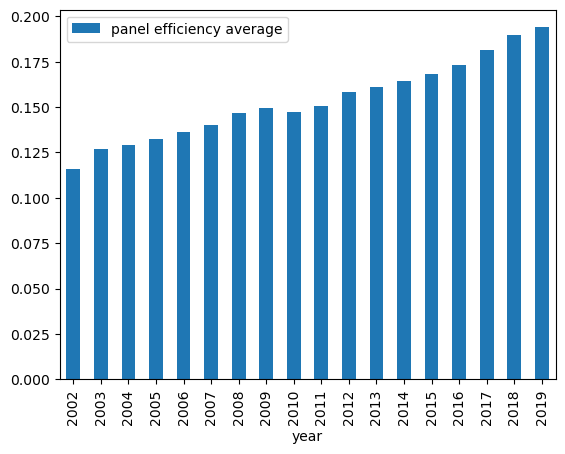

In [8]:
df = pd.read_csv(url_src, na_values = '-9999', low_memory=False)

df['installation_date'] = pd.to_datetime(df['installation_date'], format='%d-%b-%Y %H:%M:%S') 
df['year'] = df['installation_date'].dt.year

#otetaan hyötysuhteen keskiarvot vuodesta 2002
df = df[(df['year'] > 2001)]

df_years_efficiency = df.groupby('year').agg({'efficiency_module_1': ['count','mean', 'min', 'max']})

df.groupby('year')['efficiency_module_1'].mean().plot(kind='bar', legend=True, label='panel efficiency average')
print(df_years_efficiency)
plt.show()

Huomattavaa:

- vain yhdet arvolliset asennukset vuosina 1998 ja 2001
- vuoden 1999 ja 2000 arvot NaN. y2k ongelma?
- 2002-2005 sekä 2014-2015 vuosina sama minimi hyötysuhde

## Taustatyöt

- Kaikkien sarakkeiden alustava läpikäynti (ei visualisointeja)
  - [Sarakkeiden kuvaus](https://gitlab.labranet.jamk.fi/ai-da-te-team-s2022/solar-panel-data-project/-/blob/main/docs/40-Datan-kuvaus-ja-esik%C3%A4sittely/sarakkeiden_kuvauksia.ipynb)
- Tutkimusta hinnoista, tehosta ja asiakasryhmistä
  - [Teho- ja hintakehitys](https://gitlab.labranet.jamk.fi/ai-da-te-team-s2022/solar-panel-data-project/-/blob/jeren-haara/pvm_asiakkaat_hinta_koko.ipynb)
- Alueellista tarkastelua, osavaltiot ja kaupungit (ei visualisointeja)
  - [Paikkatietoja](https://gitlab.labranet.jamk.fi/ai-da-te-team-s2022/solar-panel-data-project/-/blob/teemun-haara/map_visualization.ipynb)
- Lisää asiakasryhmistä ja inverttereistä
  - [Hinta asiakasryhmittäin](https://gitlab.labranet.jamk.fi/ai-da-te-team-s2022/solar-panel-data-project/-/blob/riston_haara/teht%C3%A4v%C3%A4_2.ipynb)
- Enemmän hyötysuhteesta
  - [Hyötysuhde](https://gitlab.labranet.jamk.fi/ai-da-te-team-s2022/solar-panel-data-project/-/blob/joonan-haara/hyotysuhdepohdintaa.ipynb)